In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os

In [2]:
current_dir = os.getcwd()

# current_dir = os.path.dirname(os.path.abspath(__file__))
csv_path = os.path.join(current_dir, "..", "Data", "holland_data.csv")
csv_path = os.path.abspath(csv_path)

In [3]:
data_raw=pd.read_csv(csv_path,delimiter='\t')
data_raw.info

C:\Users\usEr\AppData\Local\Temp\ipykernel_12412\485099286.py:1: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw=pd.read_csv(csv_path,delimiter='\t')


<bound method DataFrame.info of         R1  R2  R3  R4  R5  R6  R7  R8  I1  I2  ...  orientation  race  voted  \
0        3   4   3   1   1   4   1   3   5   5  ...            1     1      2   
1        1   1   2   4   1   2   2   1   5   5  ...            3     4      1   
2        2   1   1   1   1   1   1   1   4   1  ...            1     4      2   
3        3   1   1   2   2   2   2   2   4   1  ...            1     1      2   
4        4   1   1   2   1   1   1   2   5   5  ...            3     1      2   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...          ...   ...    ...   
145823   2   1   1   1   1   1   1   2   2   3  ...            2     4      2   
145824   1   1   1   1   1   1   1   4   4   1  ...            1     3      1   
145825   1   1   1   1   1   1   1   1   1   1  ...            4     4      2   
145826   3   4   4   5   2   4   4   3   3   4  ...            5     5      1   
145827   2   4   1   4   2   3   1   4   4   4  ...            1     4      1

In [4]:
data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[48:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()

Number of participants:  145828


,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8
0,3,4,3,1,1,4,1,3,5,5,4,3,4,5,4,3,5,4,1,2,4,5,2,4,3,5,5,4,5,5,5,5,2,1,4,1,2,2,1,3,1,3,1,1,1,3,1,1
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1
2,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,2,1,1,3,1,3,1,5,3,5,5,4,4,1,3,3,5,1,4,4,3,1,3,2,2,1,2,4,1
3,3,1,1,2,2,2,2,2,4,1,2,4,3,2,3,2,5,2,4,5,1,4,4,2,4,2,3,3,2,1,3,2,5,4,3,2,3,3,2,3,3,2,3,3,2,2,2,2
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2


In [5]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib


df = data
columns = list(df.columns)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
# This (scaler ) is created just for sake of ease of calculation for clustering 
df = df.dropna(axis=0)
df_sample = df

In [6]:
root_dir = os.path.abspath(os.path.join(current_dir, "..","artifacts"))
joblib.dump(scaler, os.path.join(root_dir, 'holland_scaler.pkl'))

['c:\\Users\\usEr\\Documents\\GitHub\\Career-path-guidance-web-application\\ML\\artifacts\\holland_scaler.pkl']

In [7]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

n_label = 6
result = []
n_runs = 100

traits = {
    'Realistic': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'],
    'Investigative': ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8'],
    'Artistic': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
    'Social': ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'],
    'Enterprising': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
    'Conventional' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
}

for run in range(n_runs):
    kmeans = KMeans(n_clusters=n_label,random_state=42)
    k_fit = kmeans.fit(df_sample)

    # Predicting the Clusters
    pd.options.display.max_columns = 10

    #labels_ is used to identify Labels of each point
    predictions = k_fit.labels_
    df_sample['Clusters'] = predictions
    # df_sample.head(10)

    # คำนวณค่าเฉลี่ยในแต่ละกลุ่ม
    cluster_trait_means = {}
    for trait, columns in traits.items():
        cluster_trait_means[trait] = df_sample[columns].mean(axis=1).groupby(df_sample['Clusters']).mean()





In [8]:
value_counts = df_sample['Clusters'].value_counts()
print(value_counts)

Clusters
5    51053
4    31385
1    25259
3    14502
2    13421
0    10208
Name: count, dtype: int64


In [9]:
current_dir = os.getcwd()
csv_dir = os.path.abspath(os.path.join(current_dir, "..", "Data"))  # Path to folder
csv_path = os.path.join(csv_dir, "label_data_holland.csv")          # Full path with filename

df_sample.to_csv(csv_path, index=False)
print("Saved CSV to:", csv_path)

Saved CSV to: c:\Users\usEr\Documents\GitHub\Career-path-guidance-web-application\ML\Data\label_data_holland.csv


In [10]:
# สร้าง DataFrame แสดงค่าเฉลี่ย
cluster_means = pd.DataFrame(cluster_trait_means)

cluster_means.index = range(n_label)

# Convert the DataFrame to a numpy array
array = cluster_means.values.T  # Transpose to have clusters as columns and traits as rows

result.append(array)
# print(cluster_means)

In [11]:
df_sample

,R1,R2,R3,R4,R5,...,C5,C6,C7,C8,Clusters
0,0.6,0.8,0.6,0.2,0.2,...,0.2,0.6,0.2,0.2,5
1,0.2,0.2,0.4,0.8,0.2,...,0.2,0.4,0.2,0.2,5
2,0.4,0.2,0.2,0.2,0.2,...,0.2,0.4,0.8,0.2,4
3,0.6,0.2,0.2,0.4,0.4,...,0.4,0.4,0.4,0.4,3
4,0.8,0.2,0.2,0.4,0.2,...,1.0,1.0,0.4,0.4,5
...,...,...,...,...,...,...,...,...,...,...,...
145823,0.4,0.2,0.2,0.2,0.2,...,0.6,0.4,0.2,0.2,5
145824,0.2,0.2,0.2,0.2,0.2,...,0.2,0.8,0.6,0.2,5
145825,0.2,0.2,0.2,0.2,0.2,...,0.6,0.4,0.6,0.6,4
145826,0.6,0.8,0.8,1.0,0.4,...,1.0,0.8,0.2,0.2,5


In [12]:
average_values = np.mean(result, axis=0)

df_result = pd.DataFrame(average_values)
df_result.index = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
df_result.columns = [f'Clusters {i}' for i in range(n_label)]


In [13]:
categories = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
df = pd.DataFrame(df_result, index=categories)



In [14]:
df

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5
Realistic,0.319901,0.608460,0.367005,0.572400,0.294622,0.384069
Investigative,0.737769,0.714684,0.404238,0.587247,0.428911,0.675818
Artistic,0.427385,0.700003,0.423068,0.462622,0.382112,0.725425
Social,0.781492,0.784419,0.673487,0.530820,0.490222,0.688522
Enterprising,0.438436,0.701178,0.626943,0.525265,0.351376,0.498495
Conventional,0.414016,0.695304,0.679348,0.613900,0.316592,0.389750


In [15]:
from sklearn.preprocessing import StandardScaler
# Assuming df is your original DataFrame with rows as Holland codes and columns as Clusters
scaler = StandardScaler()

# Transpose, scale, and transpose back
scaled_array = scaler.fit_transform(df.T).T

# Create a new DataFrame with the same index and columns
scaled_df = pd.DataFrame(scaled_array, index=df.index, columns=df.columns)

In [16]:
scaled_df

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5
Realistic,-0.860679,1.515746,-0.472755,1.218774,-1.068861,-0.332225
Investigative,1.105067,0.930722,-1.413811,-0.031703,-1.227475,0.637200
Artistic,-0.670063,1.300133,-0.701262,-0.415407,-0.997254,1.483854
Social,1.090624,1.116507,0.135536,-1.126073,-1.485078,0.268484
Enterprising,-0.738786,1.540041,0.896183,0.014311,-1.493870,-0.217878
Conventional,-0.695547,1.183242,1.076668,0.639526,-1.346263,-0.857626


In [17]:
data = scaled_df.to_dict(orient='list')
data

{'Clusters 0': [-0.8606792321136556,
  1.1050669304921232,
  -0.6700631620184535,
  1.0906240399771927,
  -0.7387860591024906,
  -0.6955467812259645],
 'Clusters 1': [1.5157458874128824,
  0.9307218087817918,
  1.3001329198568163,
  1.1165071246256983,
  1.5400408481966275,
  1.1832418750459208],
 'Clusters 2': [-0.4727549742860035,
  -1.413811123719766,
  -0.7012623645606828,
  0.13553589143185996,
  0.8961832630725942,
  1.0766679489932287],
 'Clusters 3': [1.2187744385351633,
  -0.03170260753848428,
  -0.41540671829896764,
  -1.1260730989944674,
  0.014310931844192326,
  0.6395258426837799],
 'Clusters 4': [-1.0688609314996513,
  -1.227474554748666,
  -0.9972543775250329,
  -1.4850780269538952,
  -1.493870498595127,
  -1.3462629383702882],
 'Clusters 5': [-0.332225188048735,
  0.6371995467330023,
  1.4838537025463197,
  0.2684840699136091,
  -0.21787848541579144,
  -0.8576259471266758]}

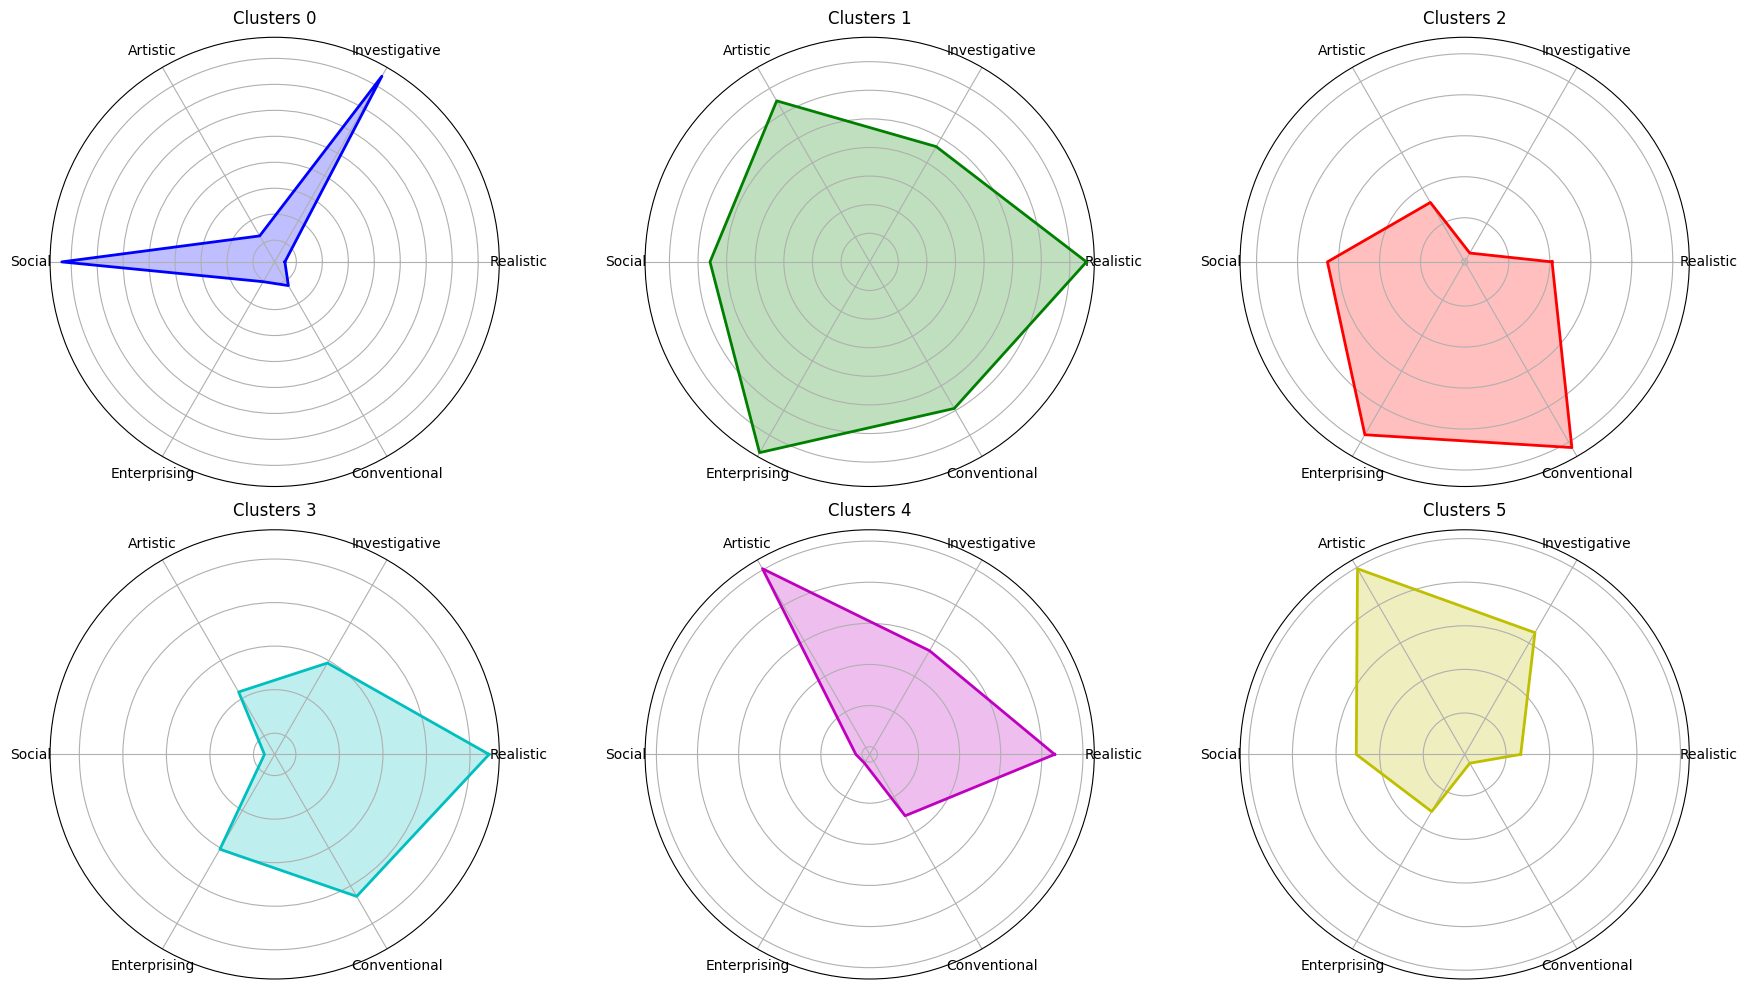

In [18]:
labels = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']

# เตรียมแกน
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# เตรียมกราฟ
fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

colors = ['b', 'g', 'r', 'c', 'm', 'y']

# วาดแต่ละ Cluster
for idx, (cluster, values) in enumerate(data.items()):
    ax = axes[idx]
    cluster_values = values + values[:1]
    ax.plot(angles, cluster_values, color=colors[idx % len(colors)], linewidth=2)
    ax.fill(angles, cluster_values, color=colors[idx % len(colors)], alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(f'{cluster}', size=12, pad=10)

plt.tight_layout()
plt.show()